To complement the theory of supervised learning, we will demonstrate how to fit a simple regression model to the Linnerud data set that we saw last week.

`scikit-learn` comes with lots of regression models that can be used as black boxes, without needing to know exactly how the method works. We'll use a very simple linear-regression model, which will be explained in detail next week.

First, we'll load the data set, as seen last week:

In [2]:
import sklearn.datasets


# Load dataset as in talk 1

X, y = sklearn.datasets.load_linnerud(return_X_y=True)

# Recall that the three X components are (chin-ups, sit-ups, jumps); and
# the three y components are (weight, waist, pulse).
# We'll create lists where xlabels[i] is the description of the i-th component of X, and so forth.
xlabels = ["Chin-ups", "Sit-ups", "Jumps"]
ylabels = ["Weight", "Waist", "Pulse"]

Before setting up a regression model, some reminders about the data set. Both are $20 \times 3$ `numpy` arrays, where each row `X[i,:]` represents the $i$-th vector in $\mathbb{R}^{3}$:

In [5]:
print("X:")
print(X)

print("y:")
print(y)

X:
[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]
y:
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


We will select one model class, `LinearRegression`. We will see this in talk 3, but a brief summary is that we learn a family of vectors $(w_{i})_{i = 1, \dots, 3}$ and $(c_{i})_{i = 1, \dots, 3}$ such that, for the data pairs $(x, y) \in \Reals^{3} \times \Reals^{3}$, we have

$$ y_{i} \approx \langle w_{i}, x \rangle + c_{i}, \qquad i = 1, \dots, 3. $$

The process of picking $w_{i}$ and $c_{i}$ using the training data is called **fitting** the model, and we do this like so:

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

Now, with unseen data points $(x', y') \in \mathbb{R}^{3} \times \mathbb{R}^{3}$, we can make predictions using the (now fixed) weights $w_{i}$ and $c_{i}$;
if the model is working well, we should have

$$ y_{i}' \approx \langle w_{i}, x' \rangle + c_{i}, \qquad i = 1, \dots, 3. $$

We do this by using the `predict` method on the regression model `model`, which we demonstrate for the example input

$$ x = (\text{chin-ups = $12$}, \text{sit-ups = $100$}, \text{jumps = $20$}) \in \mathbb{R}^{3}.$$

Note that `predict` can take multiple vectors at the same time, so it expects an array of shape `(number of data points, 3)`,
It then returns an array of the same shape, with the output components representing the predicted weight, waist, and pulse of a person who is able to complete these exercises.

In [8]:
import numpy as np

model.predict(np.array([[12, 100, 20]]))

array([[182.62332294,  35.4812422 ,  55.67018788]])

For simple problems where $(x, y) \in \mathbb{R} \times \mathbb{R}$, we could directly plot the learned linear function; but since our data pairs lie in $\mathbb{R}^{3} \times \mathbb{R}^{3}$, this is not immediately possible. 
Instead, we can plot the effect on one component $y_{j}$ that arises by changing just one component $x_{i}$, while holding the other components $x_{k}$, $k \neq i$ constant.

To do this we will generate 20 points:

$$ (\ell, 150, 60),\qquad \ell \in \{1, \dots, 20\}, $$

and then evaluate the model on these points. 
We then plot the values $y_{j}$, $j = 1, 2, 3$ in separate plots, with the 20 predicted points plotted as circles, which we connect with a line.

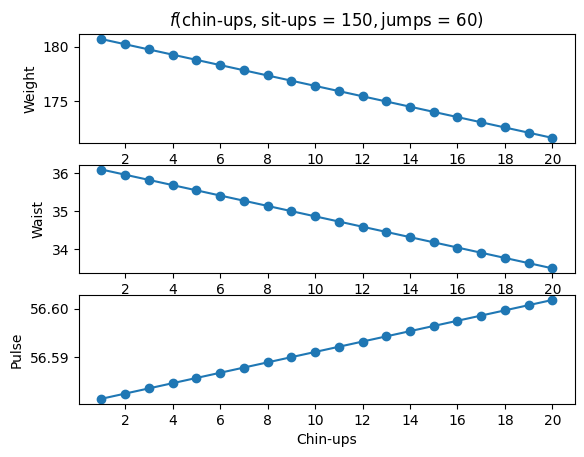

In [14]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.array([[chinups, 150, 60] for chinups in range(1, 21)])
ys = model.predict(xs)

for i in range(0, 3):
    plt.subplot(3, 1, i + 1)
    plt.plot(xs[:, 0], ys[:, i])
    plt.scatter(xs[:, 0], ys[:, i])
    plt.ylabel(ylabels[i])
    plt.xticks(range(2, 21, 2))
    if i == 0:
        plt.title(r"$f(\text{chin-ups}, \text{sit-ups = 150},  \text{jumps = 60})$")
    if i == 2:
        plt.xlabel("Chin-ups")